In [1]:
using DataFrames
using Distributions
using PyPlot

In [2]:
df = DataFrame(
id = [1],
localetype=[3],
totalpop=[50000],
demos_1_unexposed = [12500]   ,
demos_1_exposed  = [0]  ,
demos_2_unexposed = [13000],
demos_2_exposed = [0],
demos_3_unexposed = [13000],
demos_3_exposed   =[0] ,
demos_4_unexposed    =  [7500],
demos_4_exposed    = [0],
demos_5_unexposed   = [4000], 
demos_5_exposed    = [0]
)

,id,localetype,totalpop,demos_1_unexposed,demos_1_exposed,demos_2_unexposed
,Int64,Int64,Int64,Int64,Int64,Int64
1,1,3,50000,12500,0,13000


In [3]:
sum(df[1,4:13])

50000

In [4]:
df

,id,localetype,totalpop,demos_1_unexposed,demos_1_exposed,demos_2_unexposed
,Int64,Int64,Int64,Int64,Int64,Int64
1,1,3,50000,12500,0,13000


In [5]:
foo = Matrix(df)

1×13 Array{Int64,2}:
 1  3  50000  12500  0  13000  0  13000  0  7500  0  4000  0

In [6]:
foo'

13×1 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
     1
     3
 50000
 12500
     0
 13000
     0
 13000
     0
  7500
     0
  4000
     0

### Figuring out what distribution and paramaters to use; how to apply to events

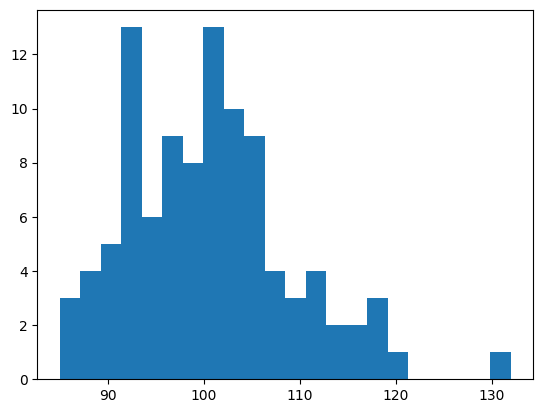

100.59
[3.0, 4.0, 5.0, 13.0, 6.0, 9.0, 8.0, 13.0, 10.0, 9.0, 4.0, 3.0, 4.0, 2.0, 2.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[85.0, 87.13636363636364, 89.27272727272727, 91.4090909090909, 93.54545454545455, 95.68181818181819, 97.81818181818181, 99.95454545454545, 102.0909090909091, 104.22727272727272, 106.36363636363636, 108.5, 110.63636363636363, 112.77272727272727, 114.9090909090909, 117.04545454545455, 119.18181818181819, 121.31818181818181, 123.45454545454545, 125.5909090909091, 127.72727272727272, 129.86363636363637, 132.0]


In [26]:
dbin = Binomial(1000,0.1)
x = rand(dbin,100);
println(mean(x))
hh = hist(x,22);
println(hh[1])
println(hh[2])

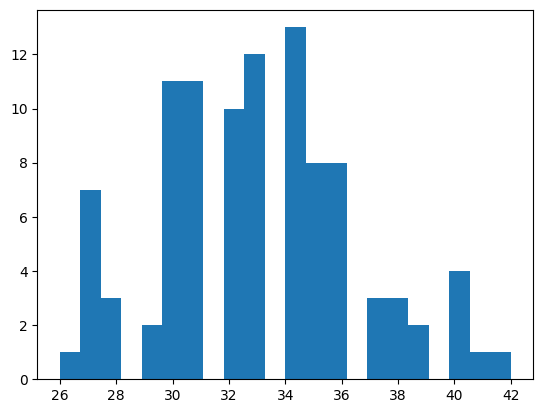

33.0


([1.0, 7.0, 3.0, 0.0, 2.0, 11.0, 11.0, 0.0, 10.0, 12.0  …  8.0, 8.0, 0.0, 3.0, 3.0, 2.0, 0.0, 4.0, 1.0, 1.0], [26.0, 26.727272727272727, 27.454545454545453, 28.18181818181818, 28.90909090909091, 29.636363636363637, 30.363636363636363, 31.09090909090909, 31.81818181818182, 32.54545454545455  …  35.45454545454545, 36.18181818181818, 36.90909090909091, 37.63636363636364, 38.36363636363636, 39.09090909090909, 39.81818181818182, 40.54545454545455, 41.27272727272727, 42.0], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x13a316df0>, PyObject <matplotlib.patches.Rectangle object at 0x13a316c10>, PyObject <matplotlib.patches.Rectangle object at 0x13a2e9310>, PyObject <matplotlib.patches.Rectangle object at 0x13a2e95e0>, PyObject <matplotlib.patches.Rectangle object at 0x13a2e98b0>, PyObject <matplotlib.patches.Rectangle object at 0x13a2e9b80>, PyObject <matplotlib.patches.Rectangle object at 0x13a2e9e50>, PyObject <matplotlib.patches.Rectangle object at 0x13a2fe160>, PyObjec

In [90]:
dhypergeo = Hypergeometric(100,200,100) # successes, failures, draws
x = rand(dhypergeo,100)
println(mean(x))
hist(x,22)

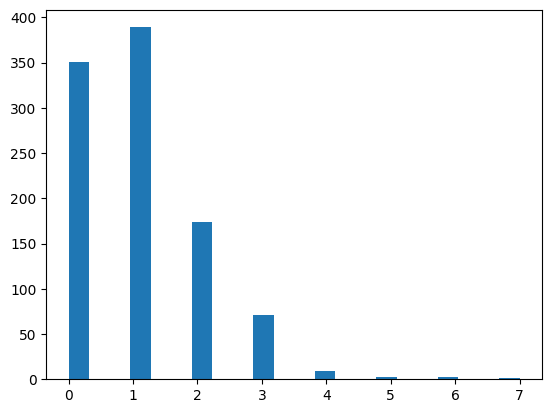

1.02


In [38]:
dpoiss = Poisson(1)
x = rand(dpoiss, 1000)
println(mean(x))
hist(x,22);

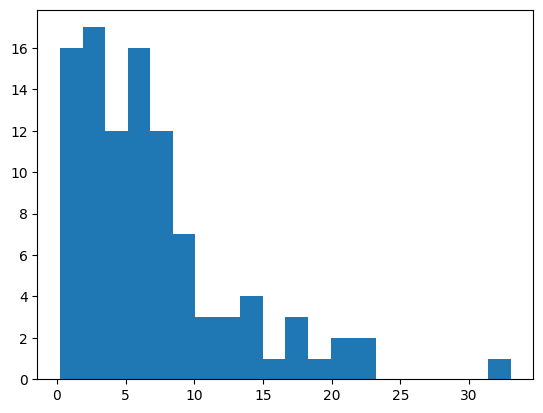

781.0


In [23]:
dgamma = Gamma(1.2,6)  #shape, scale
x = rand(dgamma,100);
hh = hist(x,20);
println(ceil(sum(hh[1] .* hh[2][2:end])))

In [16]:
hh[1]

20-element Array{Float64,1}:
 22.0
 19.0
  8.0
 11.0
  9.0
  6.0
  8.0
  3.0
  0.0
  4.0
  3.0
  0.0
  2.0
  0.0
  1.0
  1.0
  0.0
  1.0
  0.0
  2.0

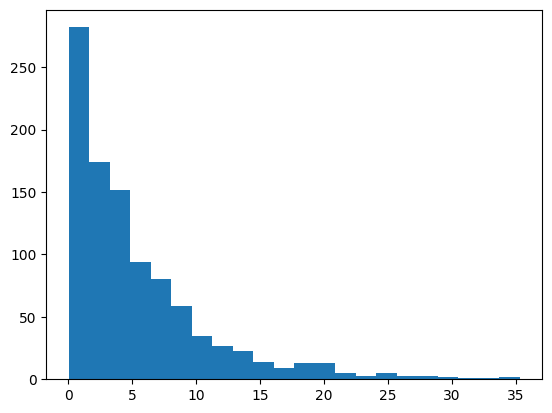

5.374664894554204


In [36]:
derlang = Erlang(1,5)  # integer shape, scale
x = rand(derlang,1000);
println(mean(x))
hist(x,22);